In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [9]:
df=pd.read_csv("List of Countries by Sugarcane Production.csv")
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


# Data Cleaning

In [10]:
df["Production (Tons)"]=df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"]=df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"]=df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"]=df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

C:\Users\KIIT\AppData\Local\Temp\ipykernel_13664\1893118209.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Production (Tons)"]=df["Production (Tons)"].str.replace(".","")
C:\Users\KIIT\AppData\Local\Temp\ipykernel_13664\1893118209.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Production per Person (Kg)"]=df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
C:\Users\KIIT\AppData\Local\Temp\ipykernel_13664\1893118209.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Acreage (He

In [11]:
#updating column names

df.rename(columns={"Production (Tons)":"Production(Tons)"}, inplace=True)
df.rename(columns={"Production per Person (Kg)":"ProductionperPerson(Kg)"}, inplace=True)
df.rename(columns={"Acreage (Hectare)":"Acreage(Hectare)"}, inplace=True)
df.rename(columns={"Yield (Kg / Hectare)":"Yield(Kg/Hectare)"}, inplace=True)

df.head()

,Unnamed: 0,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [12]:
df.isna().sum()

Unnamed: 0                 0
Country                    0
Continent                  0
Production(Tons)           0
ProductionperPerson(Kg)    0
Acreage(Hectare)           1
Yield(Kg/Hectare)          1
dtype: int64

In [13]:
#handling null values

df[df["Acreage(Hectare)"].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [14]:
df=df.dropna().reset_index()

In [15]:
df

,index,Unnamed: 0,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...,...,...
97,97,97,Spain,Europe,394,8,9,43596.5
98,98,98,Lebanon,Asia,97,16,3,28386.4
99,100,100,Singapore,Asia,50,9,2,25
100,101,101,Samoa,Oceania,12,6,1,11949.8


In [16]:
df.drop(["index","Unnamed: 0"],axis=1,inplace=True)

In [17]:
df.head()

,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [18]:
df["Production(Tons)"]=df["Production(Tons)"].astype(float)
df["ProductionperPerson(Kg)"]=df["ProductionperPerson(Kg)"].astype(float)
df["Acreage(Hectare)"]=df["Acreage(Hectare)"].astype(float)
df["Yield(Kg/Hectare)"]=df["Yield(Kg/Hectare)"].astype(float)


In [19]:
df.nunique()

Country                    102
Continent                    6
Production(Tons)           102
ProductionperPerson(Kg)    101
Acreage(Hectare)           101
Yield(Kg/Hectare)          102
dtype: int64

# Univariate Analysis

## 1. How many countries produces from each continent?

In [20]:
df.head()

,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [21]:
number_of_countries=df["Continent"].value_counts()

<Axes: >

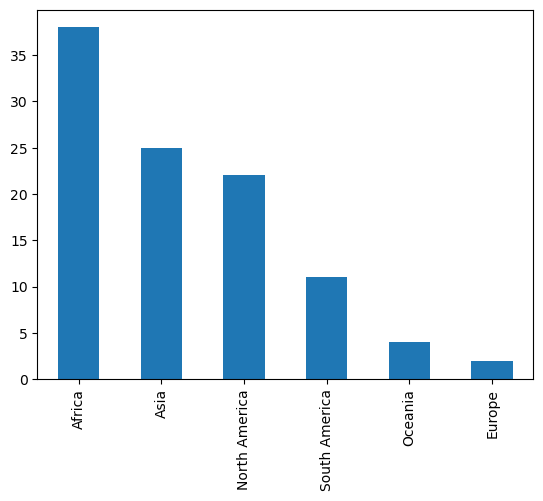

In [22]:
df["Continent"].value_counts().plot(kind="bar")

C:\Users\KIIT\AppData\Local\Temp\ipykernel_13664\3919293309.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production(Tons)"])
C:\Users\KIIT\AppData\Local\Temp\ipykernel_13664\3919293309.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["ProductionperPerson(Kg)"])
C:\Users\KIIT\App

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Density'>

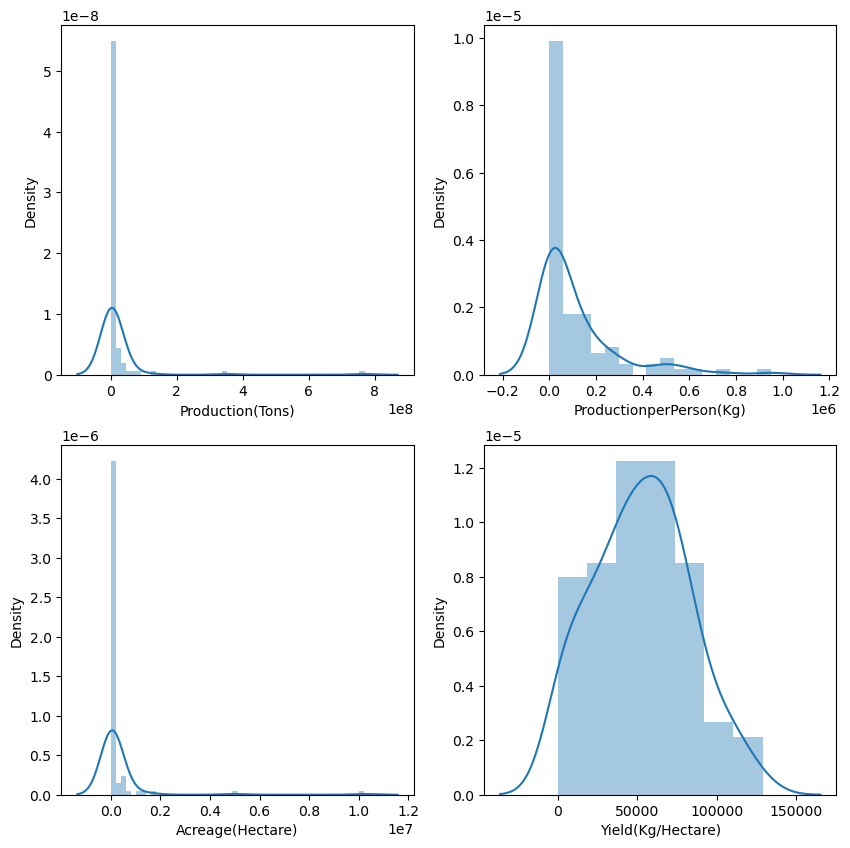

In [23]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df["Production(Tons)"])
plt.subplot(2,2,2)
sns.distplot(df["ProductionperPerson(Kg)"])
plt.subplot(2,2,3)
sns.distplot(df["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.distplot(df["Yield(Kg/Hectare)"])

<Axes: >

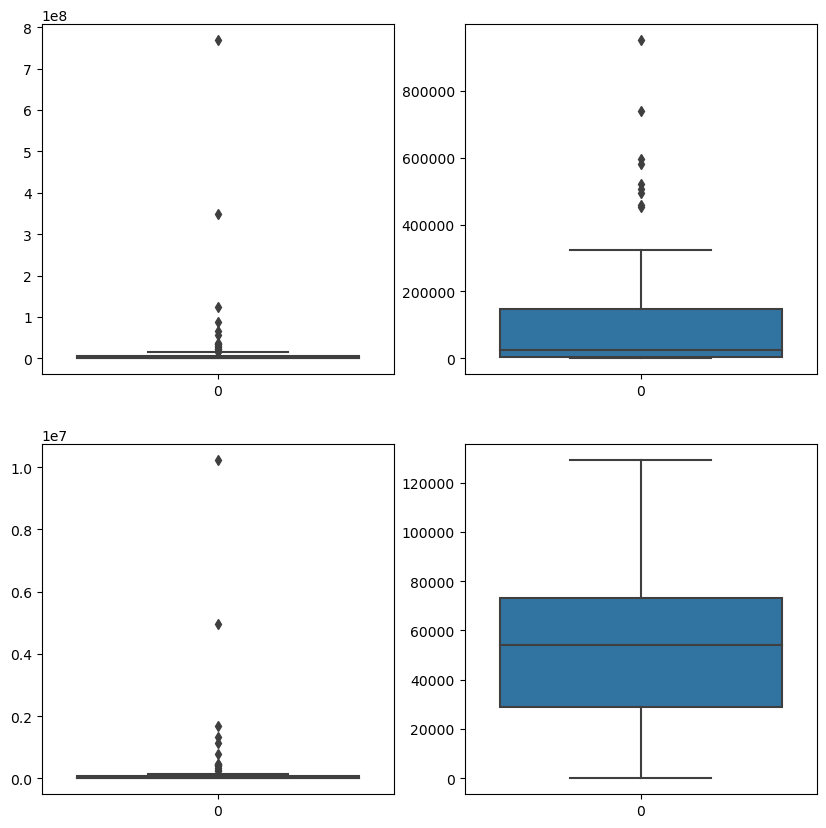

In [24]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df["Production(Tons)"])
plt.subplot(2,2,2)
sns.boxplot(df["ProductionperPerson(Kg)"])
plt.subplot(2,2,3)
sns.boxplot(df["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.boxplot(df["Yield(Kg/Hectare)"])

In [25]:
df.describe()

,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


# Bivariate Analysis

In [26]:
df.head()

,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


## 1.Which country produces maximum sugarcane

In [27]:
df_new=df[["Country","Production(Tons)"]].set_index("Country")
df_new["Production(Tons)percentage"]=df_new["Production(Tons)"]*100/df_new["Production(Tons)"].sum()

In [28]:
df_new

,Production(Tons),Production(Tons)percentage
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production(Tons)percentage'>

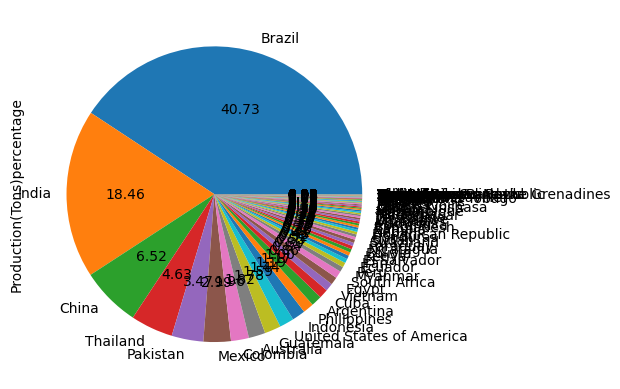

In [29]:
df_new["Production(Tons)percentage"].plot(kind="pie",autopct="%.2f")

<Axes: xlabel='Country'>

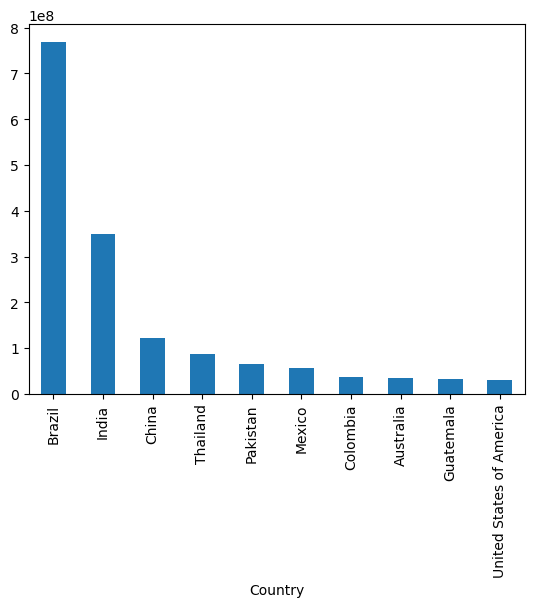

In [30]:
df_new["Production(Tons)"].head(10).plot(kind="bar")

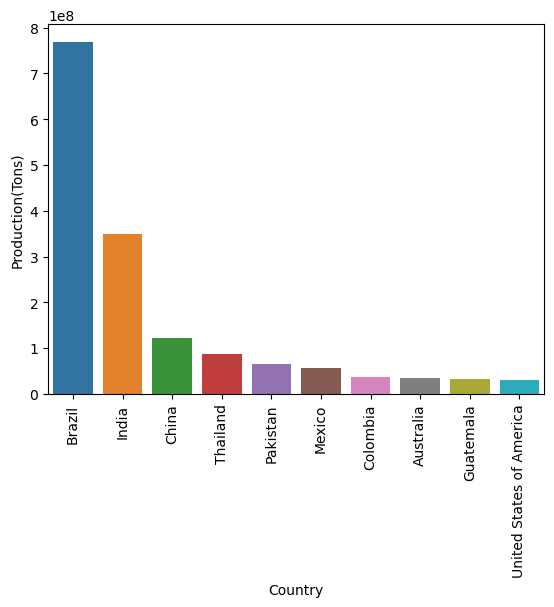

In [31]:
ax=sns.barplot(data=df.head(10),x="Country",y="Production(Tons)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

## 2.Which country has highest land?


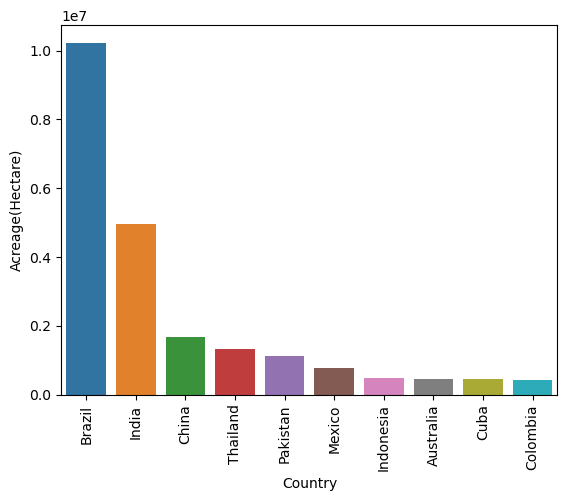

In [32]:
df_accr=df.sort_values("Acreage(Hectare)",ascending=False)
ax=sns.barplot(data=df_accr.head(10),x="Country",y="Acreage(Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

#this gives the highest land for top 10 rows not top 10 countries so we introduce df_accr

## 3.Which country has highest yield per hectare?


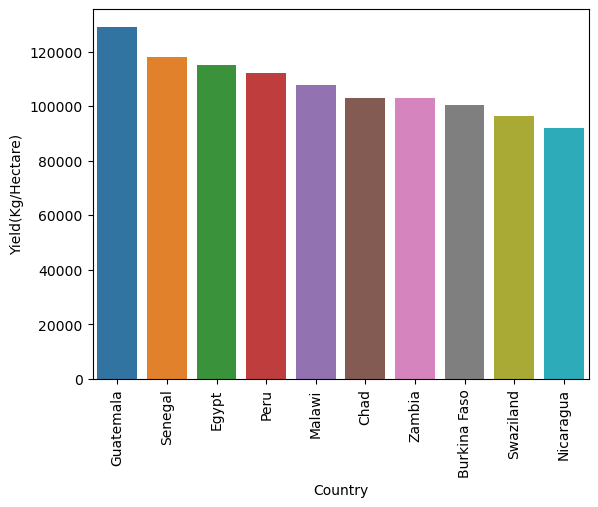

In [33]:
df_yield=df.sort_values("Yield(Kg/Hectare)",ascending=False)
ax=sns.barplot(data=df_yield.head(10),x="Country",y="Yield(Kg/Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

## 4.Which country has highest production_per_percentage?

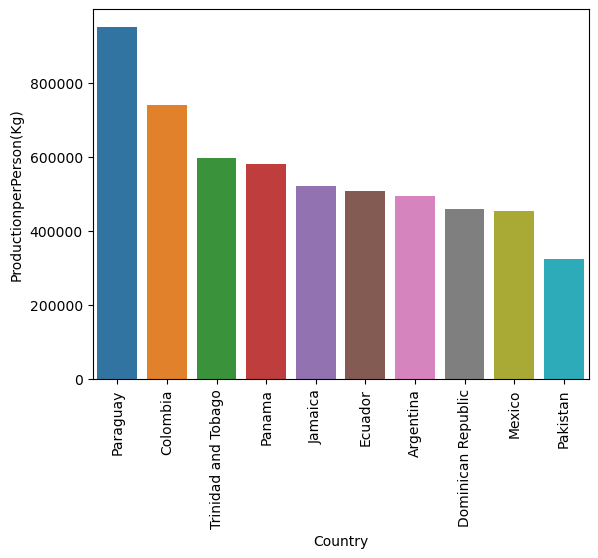

In [34]:
df_yield=df.sort_values("ProductionperPerson(Kg)",ascending=False)
ax=sns.barplot(data=df_yield.head(10),x="Country",y="ProductionperPerson(Kg)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

## 5.Correlation

In [37]:
df.corr(numeric_only=True)

,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
ProductionperPerson(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


C:\Users\KIIT\AppData\Local\Temp\ipykernel_5632\1199863406.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="Greens")


<Axes: >

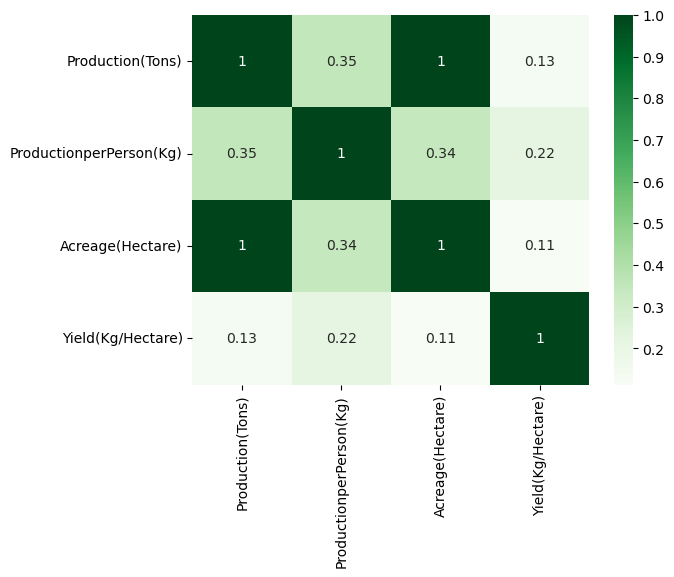

In [60]:
sns.heatmap(df.corr(),annot=True,cmap="Greens")

## 6.Do countries with highest land produces more sugarcane?


<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

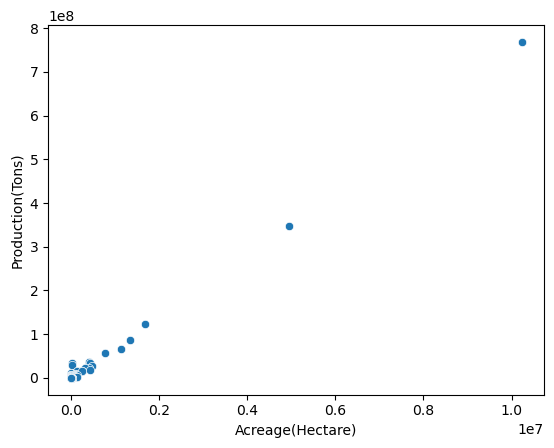

In [63]:
 sns.scatterplot(data=df,x="Acreage(Hectare)",y="Production(Tons)")

## 7.Do countries which yield more sugarcane per hectare produces more sugarcane in total?

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

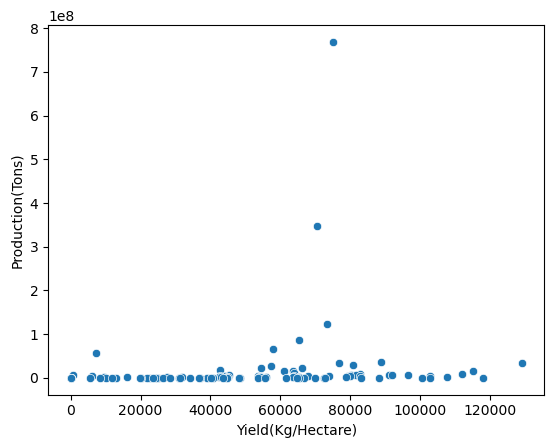

In [64]:
 sns.scatterplot(data=df,x="Yield(Kg/Hectare)",y="Production(Tons)")

#  Analysis for continent

In [65]:
df_continent=df.groupby("Continent").sum()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_5632\1663322524.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_continent=df.groupby("Continent").sum()


In [67]:
df_continent


,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,
Africa,89681472.0,10144110.0,1439089.0,2142107.5
Asia,721930425.0,3120808.0,10608319.0,1171871.4
Europe,5823.0,536.0,71.0,131870.9
North America,173995947.0,15420953.0,1581983.0,1082602.4
Oceania,36177574.0,3158066.0,490909.0,162419.1
South America,865588126.0,10228540.0,11369236.0,677192.7


## 1.Which continent produce maximum sugarcane?

<Axes: xlabel='Continent'>

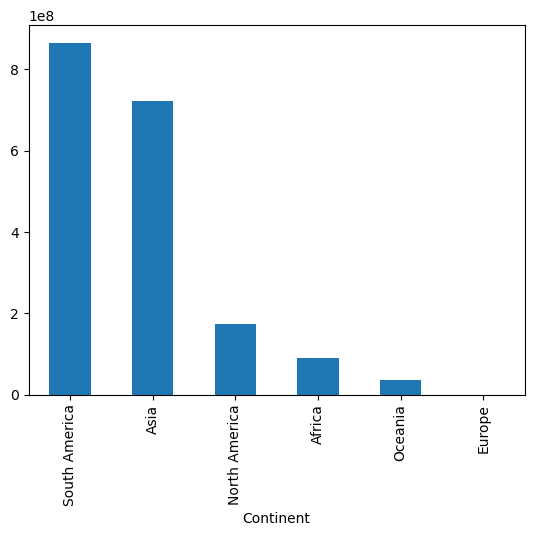

In [69]:
df_continent["Production(Tons)"].sort_values(ascending=False).plot(kind="bar")

<Axes: xlabel='Continent'>

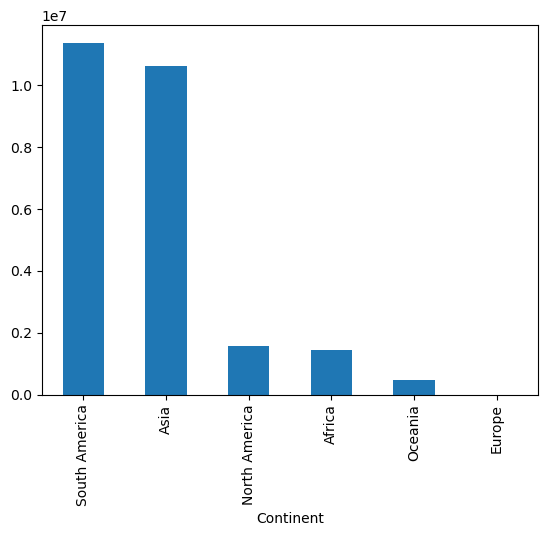

In [70]:
df_continent["Acreage(Hectare)"].sort_values(ascending=False).plot(kind="bar")

## Do number of countries in  a continent effects production of sugarcane?

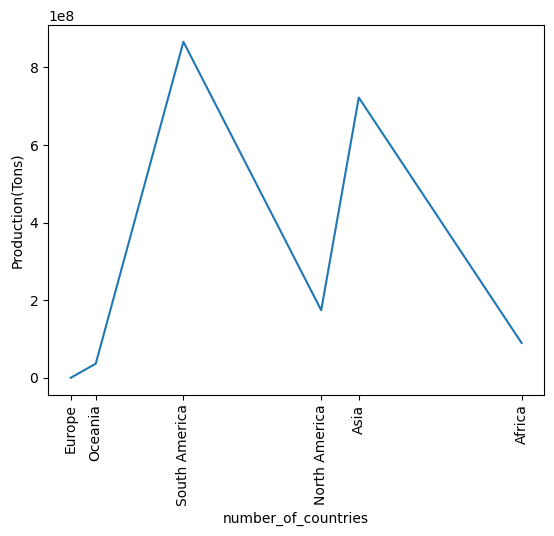

In [79]:
# no
df_continent["number_of_countries"]=df.groupby("Continent").count()["Country"]
continent_name=df_continent.index.to_list()
sns.lineplot(data=df_continent,x="number_of_countries",y="Production(Tons)")
plt.xticks(df_continent["number_of_countries"],continent_name,rotation=90)
plt.show()

## Do continent with highest land produces more sugarcane?


## Production dist by continent

<Axes: ylabel='Production(Tons)'>

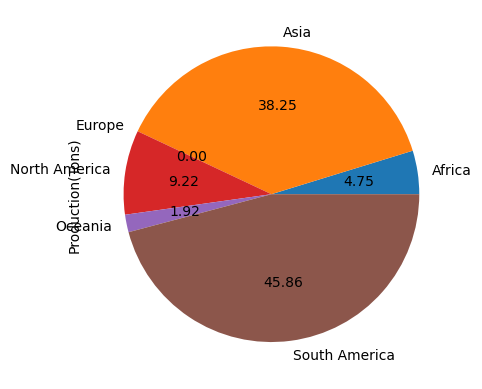

In [83]:
df_continent["Production(Tons)"].plot(kind="pie",autopct="%.2f")

## Correlation for continent

In [81]:
df_continent.corr()

,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Production(Tons),1.000000,0.143100,0.994897,0.091201,0.109244
ProductionperPerson(Kg),0.143100,1.000000,0.073059,0.541229,0.526387
Acreage(Hectare),0.994897,0.073059,1.000000,0.111166,0.132817
Yield(Kg/Hectare),0.091201,0.541229,0.111166,1.000000,0.989712
number_of_countries,0.109244,0.526387,0.132817,0.989712,1.000000
